In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

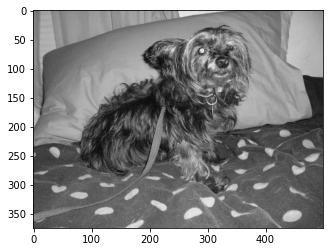

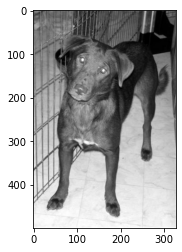

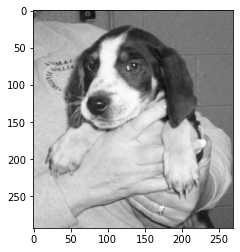

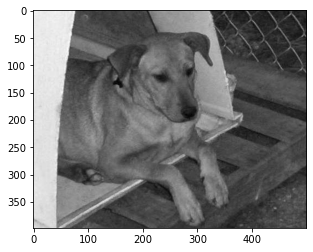

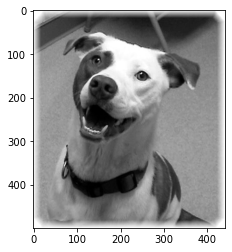

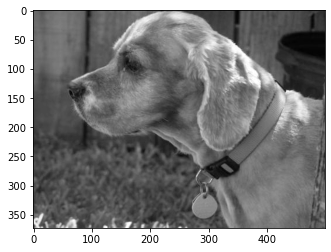

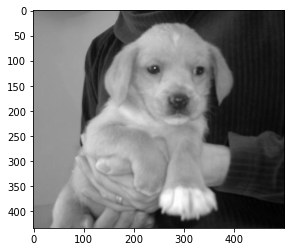

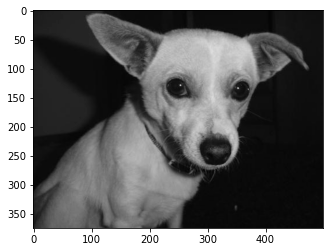

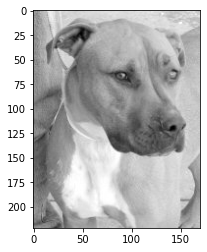

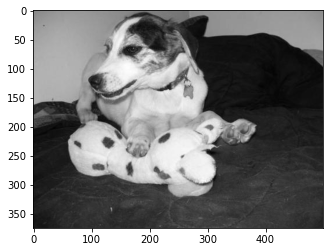

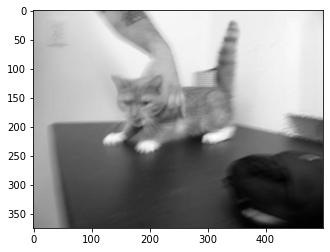

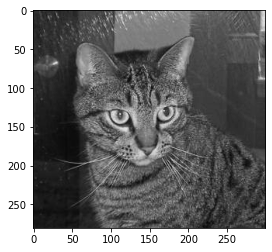

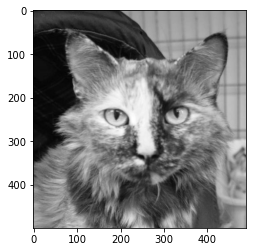

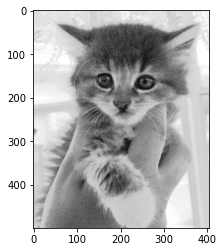

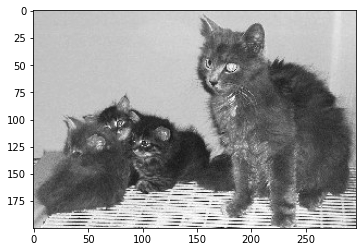

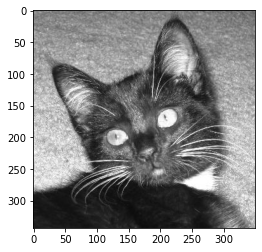

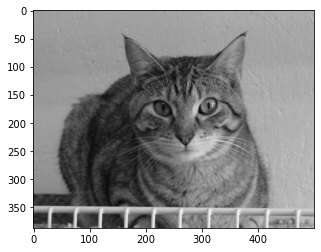

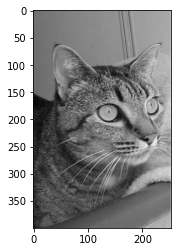

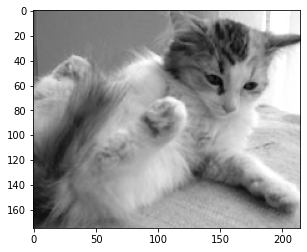

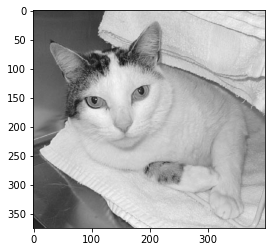

In [3]:
DATADIR = r'E:\machine learning\data\C&D'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break        

In [36]:
print(img_array)
print(img_array.shape)

[[ 58  59  59 ... 193 192 192]
 [ 59  59  60 ... 190 191 192]
 [ 59  60  61 ... 188 187 187]
 ...
 [ 37  37  37 ... 174 173 169]
 [ 37  37  36 ... 176 179 180]
 [ 36  36  36 ... 168 171 172]]
(375, 400)


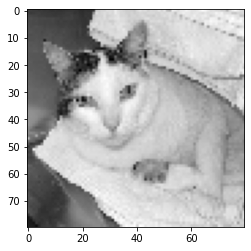

In [37]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [38]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 940.39it/s]


In [39]:
print(len(training_data))


999


In [40]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
1
0
0
1
1


In [41]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
y=np.array(y).reshape(len(training_data),1)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)


In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(64, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(64, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [43]:
optim=keras.optimizers.Adam(lr=0.001,beta_1=.9,beta_2=0.999,epsilon=1e-08,decay=0.00)
model.compile(optimizer=optim,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
history=model.fit(X,y,epochs=90,batch_size=64,validation_split = 0.1, verbose=0)


In [45]:
test_loss, test_acc = model.evaluate(X,y)
test_acc

32/32 [==============================] - 0s 4ms/step - loss: 14.2019 - accuracy: 0.4985


0.49849849939346313

In [46]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  #plt.ylim([0,.9])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()
  plt.show()

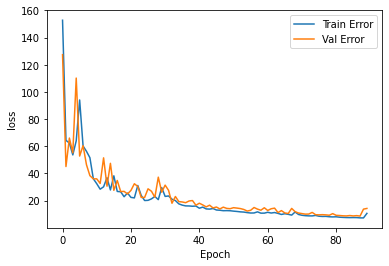

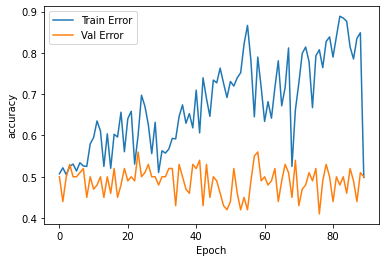

In [47]:
plot_history(history)